

# Análise de Compras Públicas de Medicamentos no Brasil (2021-2025)

Esse notebook contém a análise exploratória e comparativa de dados públicos das compras de medicamentos realizadas por entes governamentais brasileiros entre outubro de dez/21 e jul/25, com base no arquivo extraído do portal Compras.gov.br.


## Contexto
O Compras.gov.br é o sistema oficial que centraliza as aquisições públicas do Governo Federal e de entes subnacionais, registrando todo o ciclo de compras, desde planejamento, licitações, contratos e fiscalização. A transparência e o controle sobre essas compras são fundamentais para garantir eficiência e evitar irregularidades.


## Objetivo do Projeto
Analisar o comportamento de compra, variações de preços, fornecedores, marcas e modalidades de aquisição dos medicamentos selecionados, buscando identificar tendências, discrepâncias regionais, padrões de fornecedores e outras informações que possam auxiliar a transparência pública e a melhoria das políticas de saúde.


## Metodologia
- Carregamento e pré-processamento avançado dos dados, garantindo qualidade e consistência.
- Análise exploratória dos principais indicadores: volume de compras, preços unitários, fornecedores e regiões.
- Visualizações interativas para facilitar a interpretação dos dados.
- Geração de indicadores relevantes para acompanhamento da política pública.
- Documentação clara e detalhada do raciocínio analítico.


## Ferramentas Utilizadas
- Python (pandas, numpy, seaborn, matplotlib, plotly)
- Google Colab
- Exportação para PDF e HTML para entrega formal do relatório

## Dependências

- Baixar o pandas: pip install pandas
- Baixar o seaborn: pip install seaborn
- Baixar o plotly: pip install plotly


##Autora:
Larrissa Dantas

##Data:
04/07/2025



# 1. IMPORTAÇÃO DE BIBLIOTECAS
Foram escolhidas as principais bibliotecas para manipulação e análise de dados. São elas:


*  pandas: biblioteca fundamental para manipulação e análise de dados tabulares permitindo leitura de arquivos CSV, tratamento, filtragem e agregações.
*  numpy: usada para operações matemáticas e manipulação eficiente de arrays,
 essencial para cálculos estatísticos e transformações numéricas.
*  seaborn: biblioteca para visualização estatística baseada no matplotlib, facilita a criação de gráficos informativos e atraentes, especialmente para análise exploratória.
*  matplotlib.pyplot: biblioteca básica de gráficos em Python, usada para criar visualizações customizadas e configurar aspectos gráficos.
* plotly.express: biblioteca para criação de gráficos interativos e dinâmicos, essencial para explorar dados de forma mais visual e intuitiva durante a análise.
* datetime: módulo para manipulação e operações com datas e horários, fundamental para converter e extrair informações temporais dos dados.
* os: biblioteca para interagir com o sistema operacional, utilizada para manipulação de caminhos de arquivos e organização de pastas.
* IPython.display: funções para exibição avançada no notebook, como mostrar DataFrames com formatação robusta e HTML customizado para melhor apresentação.



In [135]:
import pandas as pd  # manipulação de dados em tabelas (DataFrames)
import numpy as np  # suporte a operações matemáticas e arrays
import seaborn as sns  # visualização estatística com gráficos atraentes
import matplotlib.pyplot as plt  # biblioteca base para visualizações
import plotly.express as px  # gráficos interativos dinâmicos
from datetime import datetime  # manipulação de datas e tempos
import os  # interações com o sistema de arquivos
from IPython.display import display, HTML  # exibição aprimorada no notebook
import csv  # necessário para tratar corretamente aspas em campos CSV



# Configuração padrão para visualização dos gráficos:
# O seaborn com estilo 'whitegrid' para fundo claro com grade (melhora legibilidade)
# O matplotlib com tamanho padrão maior (12x6) para melhor visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



# 2. CARREGAMENTO E INSPEÇÃO INICIAL DOS DADOS

Nessa etapa é realizado o upload da base principal (compras-gov.csv)  diretamente de uma URL pública hospedada no repositório do GitHub.
Essa abordagem permite o teste direto do notebook sem depender de upload remoto ou conexão externa.

Nessa versão, nenhum tipo de tratamento ou conversão é realizado, garantindo acesso bruto aos dados exatamente como estão disponíveis no arquivo.

A inspeção inicial dos dados é uma das práticas mais fundamentais em projetos de ciência de dados.
Busca-se entender a estrutura, a completude e a variabilidade da base de dados, respondendo perguntas como:
Qual o volume de dados disponíveis?

-  Qual o volume de dados disponíveis?
-  Como estão os tipos de variáveis?
-  Existem dados ausentes ou inconsistentes?
-  Há presença de outliers ou padrões inesperados?


Essa visualização auxilia a definir as estratégias adequadas de tratamento, modelagem e análise.






In [123]:
# Caminho local para o arquivo CSV no GitHub
file_path = "https://raw.githubusercontent.com/LarrissaSilva/case_transparencia_comprasgov_medicamentos/refs/heads/main/dados/compras-gov.csv"


try:
    df = pd.read_csv(file_path)
    print("Dados carregados com sucesso!\n")

    # Exibe os totais com ponto como separador de milhar
    print(f"Total de registros: {df.shape[0]:,}".replace(",", "."))
    print(f"Total de colunas: {df.shape[1]:,}".replace(",", "."))
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

# Remoção de colunas não recomendadas pelo enunciado do case
colunas_para_remover = ["criterioJulgamento", "nomeUnidadeMedida", "siglaUnidadeMedida", "capacidadeUnidadeFornecimento"]
df.drop(columns=[col for col in colunas_para_remover if col in df.columns], inplace=True)

# Visualização inicial dos dados
if 'df' in locals():
    print("\n Amostra inicial dos dados:")
    display(df.head(10))  # Exibe as 10 primeiras linhas para ter uma visão geral da base

    print("\n Tipos de dados por coluna:")
    display(df.dtypes.to_frame("Tipo de Dado"))

    print("\n Verificação de duplicatas:")
    total_duplicadas = df.duplicated().sum()
    print(f"Total de linhas duplicadas: {total_duplicadas}")

    print("\n Percentual de valores ausentes por coluna:")
    display(df.isna().mean().sort_values(ascending=False).to_frame("% de Nulos"))

# As estatísticas descritivas ajudam a entender a distribuição dos dados numéricos:
# count: número de observações não nulas
# mean: média dos valores
# std: desvio padrão (medida de dispersão)
# min: menor valor observado
# 25%: primeiro quartil (25% dos dados estão abaixo deste valor)
# 50%: mediana (valor central)
# 75%: terceiro quartil (75% dos dados estão abaixo deste valor)
# max: maior valor observado
    print("\n Estatísticas descritivas das variáveis numéricas:")
    display(df.describe())

    print("\n Contagem de valores únicos por coluna:")
    display(df.nunique().sort_values(ascending=False).to_frame("Valores Únicos"))

Dados carregados com sucesso!

Total de registros: 2.706
Total de colunas: 35

 Amostra inicial dos dados:


,idCompra,idItemCompra,forma,modalidade,numeroItemCompra,descricaoItem,codigoItemCatalogo,nomeUnidadeFornecimento,siglaUnidadeFornecimento,quantidade,...,nomeOrgao,poder,esfera,dataCompra,dataHoraAtualizacaoCompra,dataHoraAtualizacaoItem,dataResultado,dataHoraAtualizacaoUasg,codigoClasse,nomeClasse
0,98756505001812021,344063,SISRP,5,2,"ACICLOVIR, DOSAGEM: 200 MG",268370,NaN,NaN,"40.000,00",...,PREFEITURA DE FRANCISCO BELTRAO - PR,E,M,2022-01-21T03:00:00Z,2023-01-22T03:30:00Z,2023-01-22T04:00:00Z,2022-01-21T03:00:00Z,2023-06-16T15:04:00Z,6505,DROGAS E MEDICAMENTOS
1,15501705000692022,2187326,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"51.900,00",...,EMPRESA BRASILEIRA DE SERVIÇOS HOSPITALARES,E,F,2023-01-23T03:00:00Z,2024-01-24T03:30:00Z,2024-01-24T04:00:00Z,2023-01-23T03:00:00Z,2025-03-18T17:23:00Z,6505,DROGAS E MEDICAMENTOS
2,46256005000462022,2187831,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"300,00",...,FUNDO MUNICIPAL DE SAUDE DE GUARAI - TO,E,M,2023-01-23T03:00:00Z,2024-01-24T03:30:00Z,2024-01-24T04:00:00Z,2023-01-23T03:00:00Z,2024-03-24T15:14:00Z,6505,DROGAS E MEDICAMENTOS
3,98015105000142022,2200899,SISRP,5,4,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"12.000,00",...,PREFEITURA DE PLACIDO DE CASTRO - AC,E,M,2023-01-25T03:00:00Z,2024-01-26T03:30:00Z,2024-01-26T04:00:00Z,2023-01-25T03:00:00Z,2023-09-20T09:40:00Z,6505,DROGAS E MEDICAMENTOS
4,16024205000362021,350900,SISRP,5,12,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"300,00",...,COMANDO DO EXERCITO,E,F,2022-01-25T03:00:00Z,2023-01-26T03:30:00Z,2023-01-26T04:00:00Z,2022-01-25T03:00:00Z,2025-06-12T15:41:00Z,6505,DROGAS E MEDICAMENTOS
5,92611905003042022,2220539,SISRP,5,3,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"563.139,00",...,EDF-SECRETARIA DE ESTADO DE SAÚDE - GDF,E,E,2023-01-30T03:00:00Z,2024-01-31T03:29:59Z,2024-01-31T03:59:59Z,2023-01-30T03:00:00Z,2025-01-14T10:37:00Z,6505,DROGAS E MEDICAMENTOS
6,92611905003042022,2220540,SISRP,5,4,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"187.713,00",...,EDF-SECRETARIA DE ESTADO DE SAÚDE - GDF,E,E,2023-01-30T03:00:00Z,2024-01-31T03:29:59Z,2024-01-31T03:59:59Z,2023-01-30T03:00:00Z,2025-01-14T10:37:00Z,6505,DROGAS E MEDICAMENTOS
7,92757105000402022,2224570,SISRP,5,2,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,"50.000,00",...,AUTARQUIA MUN. DE SAUDE DE APUCARANA - PR,E,M,2023-01-31T03:00:00Z,2024-02-01T03:30:00Z,2024-02-01T04:00:00Z,2023-01-31T03:00:00Z,2024-01-19T16:38:00Z,6505,DROGAS E MEDICAMENTOS
8,25005205000042022,367922,SISRP,5,2,"ACICLOVIR, DOSAGEM: 200 MG",268370,NaN,NaN,"284.607,00",...,MINISTERIO DA SAUDE,E,F,2022-01-31T03:00:00Z,2023-02-01T03:30:00Z,2023-02-01T04:00:00Z,2022-01-31T03:00:00Z,2025-06-11T12:51:00Z,6505,DROGAS E MEDICAMENTOS
9,25005205000042022,367923,SISRP,5,3,"ACICLOVIR, DOSAGEM: 200 MG",268370,NaN,NaN,"94.868,00",...,MINISTERIO DA SAUDE,E,F,2022-01-31T03:00:00Z,2023-02-01T03:30:00Z,2023-02-01T04:00:00Z,2022-01-31T03:00:00Z,2025-06-11T12:51:00Z,6505,DROGAS E MEDICAMENTOS



 Tipos de dados por coluna:


,Tipo de Dado
idCompra,int64
idItemCompra,int64
forma,object
modalidade,int64
numeroItemCompra,int64
descricaoItem,object
codigoItemCatalogo,int64
nomeUnidadeFornecimento,object
siglaUnidadeFornecimento,object
quantidade,object



 Verificação de duplicatas:
Total de linhas duplicadas: 0

 Percentual de valores ausentes por coluna:


,% de Nulos
nomeUnidadeFornecimento,0.021064
siglaUnidadeFornecimento,0.021064
esfera,0.021064
municipio,0.003326
codigoMunicipio,0.003326
poder,0.001848
marca,0.000739
codigoItemCatalogo,0.000000
descricaoItem,0.000000
numeroItemCompra,0.000000



 Estatísticas descritivas das variáveis numéricas:


,idCompra,idItemCompra,modalidade,numeroItemCompra,codigoItemCatalogo,niFornecedor,codigoUasg,codigoOrgao,codigoClasse
count,2.706000e+03,2.706000e+03,2706.000000,2706.000000,2706.000000,2.706000e+03,2706.000000,2706.000000,2706.0
mean,6.162548e+16,3.825217e+06,5.034368,21.453067,267796.783075,2.821324e+13,616254.773097,72338.198448,6505.0
std,3.822303e+16,2.517177e+06,0.182206,58.607957,410.806269,2.100514e+13,382230.257223,29284.223092,0.0
min,1.000105e+15,5.933800e+04,5.000000,1.000000,267502.000000,1.568200e+11,10001.000000,1000.000000,6505.0
25%,1.602961e+16,1.568908e+06,5.000000,2.000000,267502.000000,9.053134e+12,160296.000000,52000.000000,6505.0
50%,9.254481e+16,3.536378e+06,5.000000,4.000000,267503.000000,2.641931e+13,925448.000000,94128.000000,6505.0
75%,9.833751e+16,5.743891e+06,5.000000,8.000000,268370.000000,4.070793e+13,983375.000000,97163.500000,6505.0
max,9.899831e+16,8.684221e+06,6.000000,613.000000,268370.000000,9.752818e+13,989983.000000,99926.000000,6505.0



 Contagem de valores únicos por coluna:


,Valores Únicos
idItemCompra,2706
idCompra,1578
dataHoraAtualizacaoItem,1044
quantidade,919
dataHoraAtualizacaoCompra,805
dataCompra,720
dataResultado,717
codigoUasg,614
nomeUasg,613
nomeFornecedor,560



# 3. PREPARAÇÃO DOS DADOS PARA ANÁLISE

Com base no que foi encontrado na Seção 2 (Inspeção Inicial dos Dados), foi realizada a conversão dos tipos de dados de cada coluna.

Durante a análise, foi percebido que grande parte dos dados apresentava tipo `object`, mesmo tratando-se de variáveis numéricas ou temporais. Isso pode dificultar a análise estatística, aplicação de filtros e agregações.

Assim, a Seção 3 realiza a preparação da base:
- Converte colunas numéricas e monetárias (corrigindo formatos brasileiros);
- Converte datas para `datetime`, mantendo o padrão brasileiro;
- Garante consistência de tipos para colunas-chave.


In [124]:

# Remove pontos e vírgulas típicos de separadores brasileiros
df["quantidade"] = (
    df["quantidade"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype("int64")
)
# Corrige escala apenas se necessário
if df["quantidade"].max() > 1e9:  # valores fora da escala esperada
    df["quantidade"] = df["quantidade"] // 100

# precoUnitario e percentualMaiorDesconto: converter para float com ponto decimal
for col in ["precoUnitario", "percentualMaiorDesconto"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype("float64")
)

# Conversão de colunas para os tipos corretos
conversoes = {
    "idCompra": "string",
    "idItemCompra": "string",
    "forma": "string",
    "modalidade": "int64",
    "numeroItemCompra": "int64",
    "descricaoItem": "string",
    "codigoItemCatalogo": "string",
    "nomeUnidadeFornecimento": "string",
    "siglaUnidadeFornecimento": "string",
    "niFornecedor": "int64",
    "nomeFornecedor": "string",
    "marca": "string",
    "codigoUasg": "string",
    "nomeUasg": "string",
    "codigoMunicipio": "string",
    "municipio": "string",
    "estado": "string",
    "codigoOrgao": "string",
    "nomeOrgao": "string",
    "poder": "string",
    "esfera": "string",
    "codigoClasse": "string",
    "nomeClasse": "string"
}

for coluna, tipo in conversoes.items():
    if coluna in df.columns:
        df[coluna] = df[coluna].astype(tipo)


# Datas principais (sem hora)
for coluna in ["dataCompra", "dataResultado"]:
    if coluna in df.columns:
        df[coluna] = (
            pd.to_datetime(df[coluna], errors='coerce', utc=True).dt.tz_localize(None).dt.floor("D"))

# Datas com hora
for coluna in ["dataHoraAtualizacaoCompra", "dataHoraAtualizacaoItem", "dataHoraAtualizacaoUasg"]:
    if coluna in df.columns:
        df[coluna] = (pd.to_datetime(df[coluna], errors='coerce', utc=True).dt.tz_localize(None))


# Visualização pós preparação
print("\n Visualização dos dados após preparação:")
display(df.head())
print("\n Tipos de dados por coluna:")
display(df.dtypes.to_frame("Tipo de Dado"))


 Visualização dos dados após preparação:


,idCompra,idItemCompra,forma,modalidade,numeroItemCompra,descricaoItem,codigoItemCatalogo,nomeUnidadeFornecimento,siglaUnidadeFornecimento,quantidade,...,nomeOrgao,poder,esfera,dataCompra,dataHoraAtualizacaoCompra,dataHoraAtualizacaoItem,dataResultado,dataHoraAtualizacaoUasg,codigoClasse,nomeClasse
0,98756505001812021,344063,SISRP,5,2,"ACICLOVIR, DOSAGEM: 200 MG",268370,<NA>,<NA>,40000,...,PREFEITURA DE FRANCISCO BELTRAO - PR,E,M,2022-01-21,2023-01-22 03:30:00,2023-01-22 04:00:00,2022-01-21,2023-06-16 15:04:00,6505,DROGAS E MEDICAMENTOS
1,15501705000692022,2187326,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,51900,...,EMPRESA BRASILEIRA DE SERVIÇOS HOSPITALARES,E,F,2023-01-23,2024-01-24 03:30:00,2024-01-24 04:00:00,2023-01-23,2025-03-18 17:23:00,6505,DROGAS E MEDICAMENTOS
2,46256005000462022,2187831,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,300,...,FUNDO MUNICIPAL DE SAUDE DE GUARAI - TO,E,M,2023-01-23,2024-01-24 03:30:00,2024-01-24 04:00:00,2023-01-23,2024-03-24 15:14:00,6505,DROGAS E MEDICAMENTOS
3,98015105000142022,2200899,SISRP,5,4,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,12000,...,PREFEITURA DE PLACIDO DE CASTRO - AC,E,M,2023-01-25,2024-01-26 03:30:00,2024-01-26 04:00:00,2023-01-25,2023-09-20 09:40:00,6505,DROGAS E MEDICAMENTOS
4,16024205000362021,350900,SISRP,5,12,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,300,...,COMANDO DO EXERCITO,E,F,2022-01-25,2023-01-26 03:30:00,2023-01-26 04:00:00,2022-01-25,2025-06-12 15:41:00,6505,DROGAS E MEDICAMENTOS



 Tipos de dados por coluna:


,Tipo de Dado
idCompra,string[python]
idItemCompra,string[python]
forma,string[python]
modalidade,int64
numeroItemCompra,int64
descricaoItem,string[python]
codigoItemCatalogo,string[python]
nomeUnidadeFornecimento,string[python]
siglaUnidadeFornecimento,string[python]
quantidade,int64



# 4. ANÁLISE EXPLORATÓRIA DOS DADOS

Essa etapa apresenta uma visão abrangente dos dados, buscando padrões, outliers e comportamentos relevantes. A análise é guiada por perguntas do case e boas práticas da ciência de dados.

Estrutura da análise (geral):
4.1 Visão Geral dos Dados
4.2 Comportamento de Compra
4.3 Visão Geral de Compras
4.4 Preço Pago por Item
4.5 Indicadores e Reflexões


#4.1 Visão Geral dos Dados

Apresentação geral dos dados. Seguindo os seguintes passos:

-   Estrutura geral do DataFrame
-   Amostra dos dados (5 primeiras linhas)
-   Tipos de dados por coluna
-   Contagem de valores únicos por coluna
-   Estatísticas descritivas para variáveis numéricas
-   Estatísticas para variáveis categóricas
-   Percentual de valores nulos por coluna
-   Total de registros duplicados
-   Resumo geral por tipo de dado
-   Verificação de colunas que podem ser chaves
-   Frequência de registros por ano de compra










In [126]:
print("\n Estrutura geral do DataFrame")
print(f"Total de registros (linhas): {df.shape[0]}")
print(f"Total de atributos (colunas): {df.shape[1]}")

print("\n Amostra dos dados (5 primeiras linhas):")
display(df.head())

print("\n Tipos de dados por coluna:")
display(df.dtypes.to_frame(name="Tipo"))

print("\n Contagem de valores únicos por coluna:")
display(df.nunique().sort_values(ascending=False).to_frame(name="Valores Únicos"))

print("\n Estatísticas descritivas para variáveis numéricas:")
display(df.select_dtypes(include=["int64", "float64"]).describe().T)

print("\n Estatísticas para variáveis categóricas:")
display(df.select_dtypes(include=["string", "category"]).describe().T)

print("\n Percentual de valores nulos por coluna:")
display((df.isnull().mean() * 100).sort_values(ascending=False).to_frame(name="Nulos (%)"))

print("\n Total de registros duplicados:")
print(df.duplicated().sum())

print("\n Resumo geral por tipo de dado:")
categoricas = df.select_dtypes(include=["string", "category"]).columns.tolist()
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
datas = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()

resumo_tipos = pd.DataFrame({
    "Tipo": ["Categórica", "Numérica", "Datas"],
    "Total de Colunas": [len(categoricas), len(numericas), len(datas)]
})
display(resumo_tipos)

print("\n Verificação de colunas que podem ser chaves:")
chaves_candidatas = [col for col in df.columns if df[col].is_unique]
print("Colunas únicas (possíveis chaves primárias):", chaves_candidatas)

print("\n Frequência de registros por ano de compra:")
if "dataCompra" in df.columns:
    display(df["dataCompra"].dt.year.value_counts().sort_index().to_frame(name="Nº de Compras"))


 Estrutura geral do DataFrame
Total de registros (linhas): 2706
Total de atributos (colunas): 31

 Amostra dos dados (5 primeiras linhas):


,idCompra,idItemCompra,forma,modalidade,numeroItemCompra,descricaoItem,codigoItemCatalogo,nomeUnidadeFornecimento,siglaUnidadeFornecimento,quantidade,...,nomeOrgao,poder,esfera,dataCompra,dataHoraAtualizacaoCompra,dataHoraAtualizacaoItem,dataResultado,dataHoraAtualizacaoUasg,codigoClasse,nomeClasse
0,98756505001812021,344063,SISRP,5,2,"ACICLOVIR, DOSAGEM: 200 MG",268370,<NA>,<NA>,40000,...,PREFEITURA DE FRANCISCO BELTRAO - PR,E,M,2022-01-21,2023-01-22 03:30:00,2023-01-22 04:00:00,2022-01-21,2023-06-16 15:04:00,6505,DROGAS E MEDICAMENTOS
1,15501705000692022,2187326,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,51900,...,EMPRESA BRASILEIRA DE SERVIÇOS HOSPITALARES,E,F,2023-01-23,2024-01-24 03:30:00,2024-01-24 04:00:00,2023-01-23,2025-03-18 17:23:00,6505,DROGAS E MEDICAMENTOS
2,46256005000462022,2187831,SISRP,5,1,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,300,...,FUNDO MUNICIPAL DE SAUDE DE GUARAI - TO,E,M,2023-01-23,2024-01-24 03:30:00,2024-01-24 04:00:00,2023-01-23,2024-03-24 15:14:00,6505,DROGAS E MEDICAMENTOS
3,98015105000142022,2200899,SISRP,5,4,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,12000,...,PREFEITURA DE PLACIDO DE CASTRO - AC,E,M,2023-01-25,2024-01-26 03:30:00,2024-01-26 04:00:00,2023-01-25,2023-09-20 09:40:00,6505,DROGAS E MEDICAMENTOS
4,16024205000362021,350900,SISRP,5,12,"ACICLOVIR, DOSAGEM: 200 MG",268370,COMPRIMIDO,COMPR,300,...,COMANDO DO EXERCITO,E,F,2022-01-25,2023-01-26 03:30:00,2023-01-26 04:00:00,2022-01-25,2025-06-12 15:41:00,6505,DROGAS E MEDICAMENTOS



 Tipos de dados por coluna:


,Tipo
idCompra,string[python]
idItemCompra,string[python]
forma,string[python]
modalidade,int64
numeroItemCompra,int64
descricaoItem,string[python]
codigoItemCatalogo,string[python]
nomeUnidadeFornecimento,string[python]
siglaUnidadeFornecimento,string[python]
quantidade,int64



 Contagem de valores únicos por coluna:


,Valores Únicos
idItemCompra,2706
idCompra,1578
dataHoraAtualizacaoItem,1044
quantidade,919
dataHoraAtualizacaoCompra,805
dataCompra,720
dataResultado,717
codigoUasg,614
nomeUasg,613
nomeFornecedor,560



 Estatísticas descritivas para variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max
modalidade,2706.0,5.034368e+00,1.822064e-01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
numeroItemCompra,2706.0,2.145307e+01,5.860796e+01,1.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,6.130000e+02
quantidade,2706.0,4.033528e+05,2.796360e+06,1.000000e+00,3.000000e+03,2.000000e+04,1.049980e+05,7.100000e+07
precoUnitario,2706.0,3.895795e+02,8.576996e+03,2.000000e-02,4.000000e-02,6.000000e-02,1.900000e-01,2.533000e+05
percentualMaiorDesconto,2706.0,1.692757e-01,3.729377e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01
niFornecedor,2706.0,2.821324e+13,2.100514e+13,1.568200e+11,9.053134e+12,2.641931e+13,4.070793e+13,9.752818e+13



 Estatísticas para variáveis categóricas:


,count,unique,top,freq
idCompra,2706,1578,16015805000062021,7
idItemCompra,2706,2706,2187831,1
forma,2706,2,SISRP,2400
descricaoItem,2706,3,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",929
codigoItemCatalogo,2706,3,267502,929
nomeUnidadeFornecimento,2649,6,COMPRIMIDO,2592
siglaUnidadeFornecimento,2649,6,COMPR,2592
nomeFornecedor,2706,560,DROGAFONTE LTDA,115
marca,2704,499,HIPOLABOR,151
codigoUasg,2706,614,980921,21



 Percentual de valores nulos por coluna:


,Nulos (%)
nomeUnidadeFornecimento,2.106430
siglaUnidadeFornecimento,2.106430
esfera,2.106430
municipio,0.332594
codigoMunicipio,0.332594
poder,0.184775
marca,0.073910
codigoItemCatalogo,0.000000
descricaoItem,0.000000
numeroItemCompra,0.000000



 Total de registros duplicados:
0

 Resumo geral por tipo de dado:


,Tipo,Total de Colunas
0,Categórica,20
1,Numérica,6
2,Datas,5



 Verificação de colunas que podem ser chaves:
Colunas únicas (possíveis chaves primárias): ['idItemCompra']

 Frequência de registros por ano de compra:


,Nº de Compras
dataCompra,
2021,53
2022,752
2023,758
2024,704
2025,439



# 4.2 COMPORTAMENTO DE COMPRA

Essa seção investiga o comportamento de compra de medicamentos pelo governo, com foco nos fornecedores e sua distribuição geográfica.

A pergunta principal é: "Há fornecedores que são frequentemente contratados apesar de sua localização geográfica?"

Para isso, foi análisada a quantidade total adquirida por fornecedor, a diversidade geográfica (UFs atendidas), e a quantidade por combinação fornecedor + estado.

Conclusão analítica:

Sim, há fornecedores que apresentam ampla atuação nacional, sendo contratados por diversos estados da federação, mesmo que sua base esteja localizada em apenas uma ou poucas unidades da federação.

Essa estrutura de compras aponta para a existência de fornecedores logísticos estratégicos, muitos dos quais aproveitam modalidades como SISRP para atender múltiplas UFs. Por outro lado, a concentração regional também acende alerta sobre dependência e risco de desabastecimento.

É recomendado explorar políticas públicas que incentivem a diversificação de fornecedores por região, promovendo concorrência.

Evidências observadas:

1.  Fornecedores com contratos em mais de 20 UFs diferentes.
2.  Alta quantidade total fornecida por poucos fornecedores, indicando concentração.
3. Relação entre volume fornecido e número de estados atendidos mostra atuação nacional consistente de alguns fornecedores.
---
A apresentação da análise segue:

-  Fornecedores mais contratados (por quantidade total adquirida)
-   Diversidade geográfica dos fornecedores (quantidade de estados distintos atendidos)
-   Top 10 fornecedor-estado por volume de compras
-   Comparação entre quantidade fornecida e diversidade geográfica
-   Participação percentual dos top 5 fornecedores por medicamento (%)
-   Participação do principal fornecedor por estado
-   Número de fornecedores distintos por medicamento

---
Gráficos:

Gráfico 1:
A métrica “Participação do Principal Fornecedor (%)” representa o quanto o fornecedor mais contratado em um estado contribuiu para o total de compras daquele estado, em termos de quantidade adquirida.

Essa visualização facilita a percepção da dependência regional, permitindo observar:
-   Quais estados concentram suas compras em um único fornecedor.
-   Diferenças de comportamento regional nas contratações.
-   Quais apresentam maior diversidade na distribuição.

Observações: 1) Estados com barras próximas de 1 (ou 100%) indicam alta dependência de um único fornecedor. 2) Quanto menor a barra, maior a diversidade de fornecimento no estado. 3) Essa visualização ajuda na idenificação de riscos de concentração e oportunidade de diversificação de fornecedores.

Gráfico 2:
Esse gráfico mostra no eixo Y: medicamentos (ou estados, dependendo do foco). Barras empilhadas: os principais fornecedores (nominalmente), e sua participação percentual em cada medicamento.
Possibilitando a visualização de quem são os fornecedores dominantes e o grau de concentração.









 Fornecedores mais contratados (por quantidade total adquirida):


,Quantidade Total Adquirida
nomeFornecedor,
COMERCIAL CIRURGICA RIOCLARENSE LTDA,163468376
CENTERMEDI-COMERCIO DE PRODUTOS HOSPITALARES LTDA,95758701
T S COMERCIAL DE MEDICAMENTOS E REPRESENTACAO LTDA,71227720
DROGAFONTE LTDA,70342522
ESSENCIAL RIO DISTRIBUIDORA DE PRODUTOS MEDICOS E HOSPITALARES LTDA,56461540
ATONS DO BRASIL DISTRIBUIDORA DE PRODUTOS HOSPITALARES LTDA,41560664
NUTRIENTES MED DISTRIBUIDORA DE MEDICAMENTOS LTDA,28249600
EREMED DISTRIBUIDORA DE MEDICAMENTOS LTDA,25564330
CIMED INDUSTRIA S.A.,25209623



 Diversidade geográfica dos fornecedores (quantidade de estados distintos atendidos):


,Número de UFs Atendidas
nomeFornecedor,
MEDMAX COMERCIO DE MEDICAMENTOS LTDA,20
BELMED DISTRIBUIDORA DE MEDICAMENTOS LTDA,19
CLM FARMA COMERCIO E DISTRIBUIDORA DE MEDICAMENTOS LTDA,19
HEALTH DISTRIBUIDORA DE MEDICAMENTOS LTDA,15
COMERCIAL CIRURGICA RIOCLARENSE LTDA,15
MEDICINALE DISTRIBUIDORA DE MEDICAMENTOS E MATERIAIS HOSPITALARES LTDA,15
INOVAMED HOSPITALAR LTDA,15
DROGAFONTE LTDA,15
TOP NORTE COMERCIO DE MATERIAL MEDICO HOSPITALAR LTDA,15



 Top 10 fornecedor-estado por volume de compras:


,nomeFornecedor,estado,Quantidade Total
0,CENTERMEDI-COMERCIO DE PRODUTOS HOSPITALARES LTDA,PR,81941400
1,T S COMERCIAL DE MEDICAMENTOS E REPRESENTACAO ...,CE,71223520
2,COMERCIAL CIRURGICA RIOCLARENSE LTDA,RJ,65748264
3,ESSENCIAL RIO DISTRIBUIDORA DE PRODUTOS MEDICO...,RJ,56461540
4,DROGAFONTE LTDA,RJ,50614896
5,COMERCIAL CIRURGICA RIOCLARENSE LTDA,CE,31436810
6,ATONS DO BRASIL DISTRIBUIDORA DE PRODUTOS HOSP...,ES,30161900
7,NUTRIENTES MED DISTRIBUIDORA DE MEDICAMENTOS LTDA,CE,28249600
8,SOMA/SP PRODUTOS HOSPITALARES LTDA,SP,24071713
9,COMERCIAL CIRURGICA RIOCLARENSE LTDA,DF,23052082



 Comparação entre quantidade fornecida e diversidade geográfica:


,Quantidade Total Adquirida,Número de UFs Atendidas,Média por UF
nomeFornecedor,,,
COMERCIAL CIRURGICA RIOCLARENSE LTDA,163468376,15,10897891.73
CENTERMEDI-COMERCIO DE PRODUTOS HOSPITALARES LTDA,95758701,10,9575870.10
T S COMERCIAL DE MEDICAMENTOS E REPRESENTACAO LTDA,71227720,2,35613860.00
DROGAFONTE LTDA,70342522,15,4689501.47
ESSENCIAL RIO DISTRIBUIDORA DE PRODUTOS MEDICOS E HOSPITALARES LTDA,56461540,1,56461540.00
ATONS DO BRASIL DISTRIBUIDORA DE PRODUTOS HOSPITALARES LTDA,41560664,2,20780332.00
NUTRIENTES MED DISTRIBUIDORA DE MEDICAMENTOS LTDA,28249600,1,28249600.00
EREMED DISTRIBUIDORA DE MEDICAMENTOS LTDA,25564330,10,2556433.00
CIMED INDUSTRIA S.A.,25209623,9,2801069.22



 Participação percentual dos top 5 fornecedores por medicamento (%):


,Participação percentual dos top 5 fornecedores por medicamento (%)
descricaoItem,
"ACICLOVIR, DOSAGEM: 200 MG",65.8 %
"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",56.32 %
"ÁCIDO FÓLICO, DOSAGEM: 5 MG",39.11 %



 Participação do principal fornecedor por estado:


,,Participação do Principal Fornecedor (%)
estado,nomeFornecedor,
AC,DIMASTER - COMERCIO DE PRODUTOS HOSPITALARES LTDA.,34.73 %
AL,CENTERMEDI-COMERCIO DE PRODUTOS HOSPITALARES LTDA,35.69 %
AM,MCW PRODUTOS MEDICOS E HOSPITALARES LTDA,15.41 %
AP,COMERCIAL CIRURGICA RIOCLARENSE LTDA,32.03 %
BA,D.ARAUJO COMERCIO ATACADISTA LTDA,15.09 %
CE,T S COMERCIAL DE MEDICAMENTOS E REPRESENTACAO LTDA,45.79 %
DF,COMERCIAL CIRURGICA RIOCLARENSE LTDA,37.35 %
ES,ATONS DO BRASIL DISTRIBUIDORA DE PRODUTOS HOSPITALARES LTDA,68.29 %
GO,MG2 DISTRIBUIDORA DE MEDICAMENTOS LTDA,22.0 %



Diversidade de fornecedores por estado:


,Fornecedores Únicos por Estado
estado,
AP,15
PI,15
TO,15
AC,17
SE,20
SC,22
ES,31
CE,31
RR,32



 Número de fornecedores distintos por medicamento:


,Número de Fornecedores
descricaoItem,
"ÁCIDO FÓLICO, DOSAGEM: 5 MG",312
"ACICLOVIR, DOSAGEM: 200 MG",304
"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",285


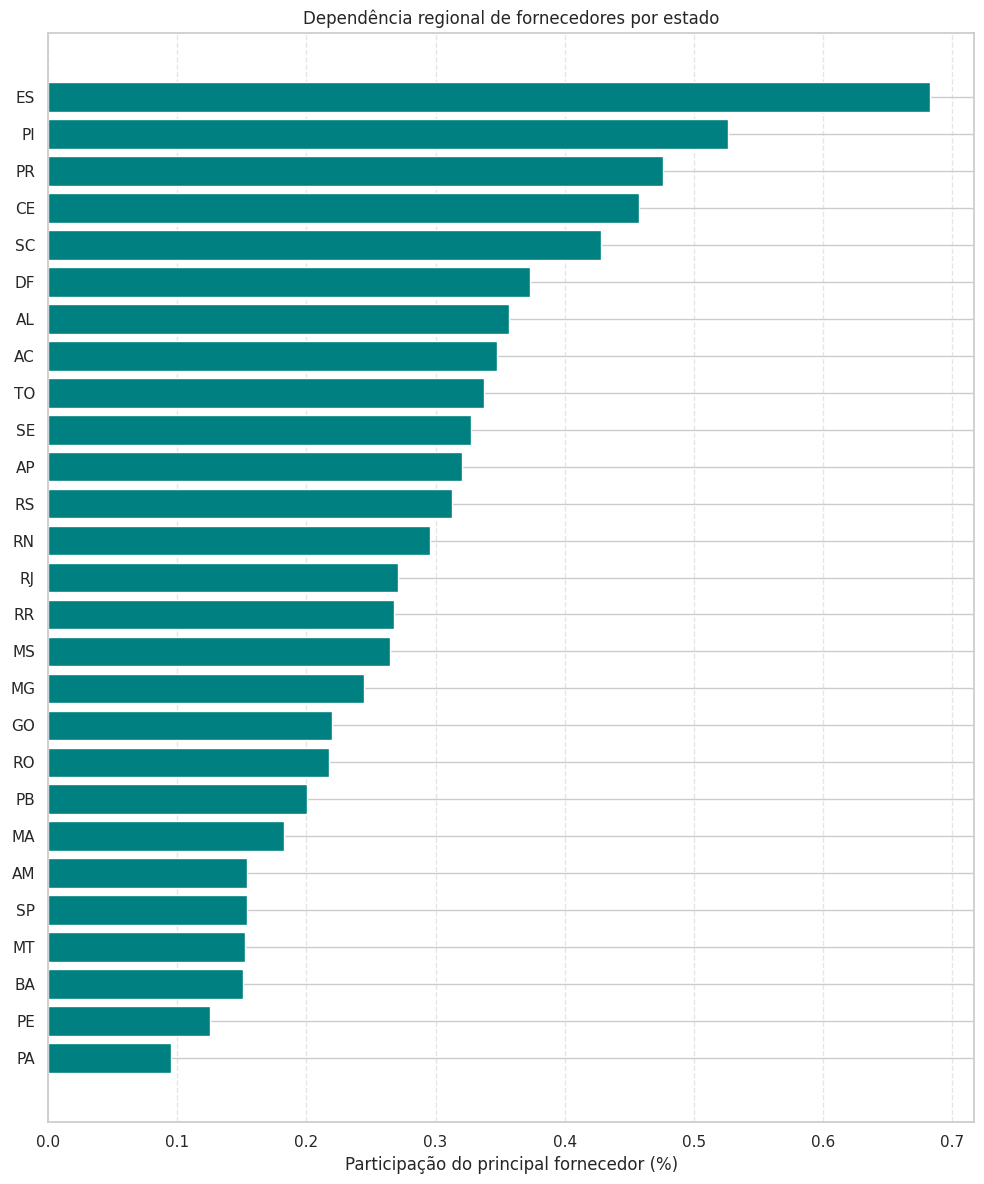

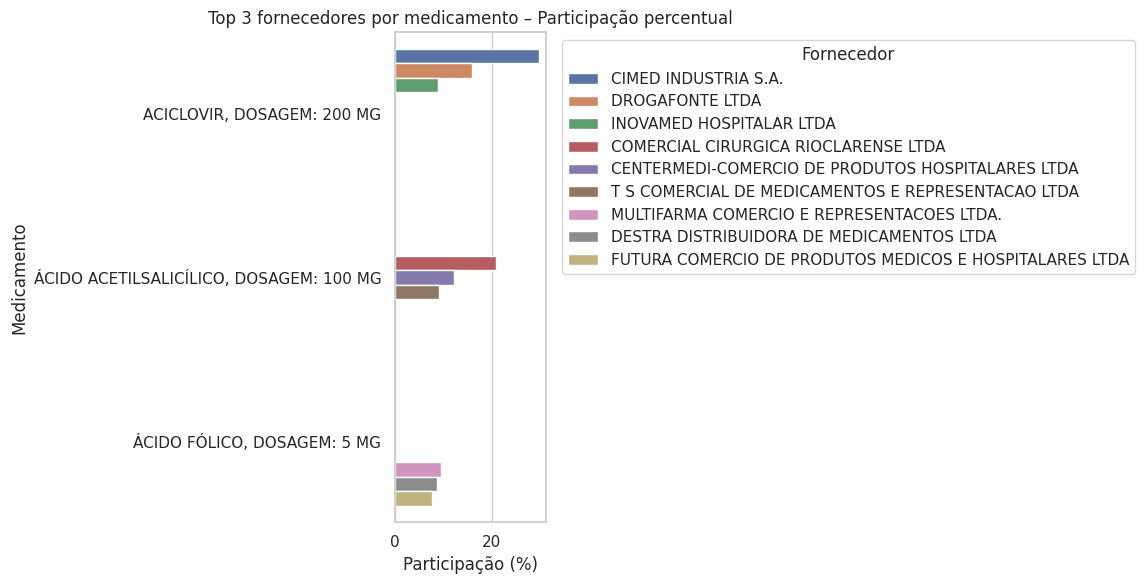

In [127]:
# 4.2 COMPORTAMENTO DE COMPRA

print("\n Fornecedores mais contratados (por quantidade total adquirida):")
fornecedor_mais_comprado = (
    df.groupby("nomeFornecedor")["quantidade"]
      .sum()
      .sort_values(ascending=False)
      .to_frame(name="Quantidade Total Adquirida")
)
display(fornecedor_mais_comprado.head(10))

print("\n Diversidade geográfica dos fornecedores (quantidade de estados distintos atendidos):")
fornecedor_ufs = (
    df.groupby("nomeFornecedor")["estado"]
      .nunique()
      .sort_values(ascending=False)
      .to_frame(name="Número de UFs Atendidas")
)
display(fornecedor_ufs.head(10))

print("\n Top 10 fornecedor-estado por volume de compras:")
top_fornecedor_estado = (
    df.groupby(["nomeFornecedor", "estado"])["quantidade"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .to_frame(name="Quantidade Total")
      .reset_index()
)
display(top_fornecedor_estado)

print("\n Comparação entre quantidade fornecida e diversidade geográfica:")
fornecedor_comportamento = fornecedor_mais_comprado.join(fornecedor_ufs)
fornecedor_comportamento["Média por UF"] = (fornecedor_comportamento["Quantidade Total Adquirida"] / fornecedor_comportamento["Número de UFs Atendidas"]).round(2)
display(fornecedor_comportamento.sort_values(by="Quantidade Total Adquirida", ascending=False).head(10))

# Participação percentual dos top 5 fornecedores por medicamento
print("\n Participação percentual dos top 5 fornecedores por medicamento (%):")
def top5_participacao(grupo):
    return grupo.sort_values(ascending=False).head(5).sum() / grupo.sum()

concentracao = (
    df.groupby(["descricaoItem", "nomeFornecedor"])["quantidade"]
      .sum()
      .groupby(level=0, group_keys=False)
      .apply(top5_participacao)
      .to_frame(name="Participação percentual dos top 5 fornecedores por medicamento (%)")
)

# Formata como porcentagem legível com duas casas decimais
concentracao["Participação percentual dos top 5 fornecedores por medicamento (%)"] = (
    concentracao["Participação percentual dos top 5 fornecedores por medicamento (%)"] * 100
).round(2).astype(str) + " %"

# Exibe os 10 medicamentos com maior concentração
display(concentracao.sort_values(by="Participação percentual dos top 5 fornecedores por medicamento (%)", ascending=False).head(10))

# Dependência regional - participação do principal fornecedor por estado
print("\n Participação do principal fornecedor por estado:")
dep_regional = (
    df.groupby(["estado", "nomeFornecedor"])["quantidade"]
      .sum()
      .groupby(level=0, group_keys=False)
      .apply(lambda x: (x / x.sum()).sort_values(ascending=False).head(1))
      .to_frame(name="Participação do Principal Fornecedor (%)")
)

# Formatação como porcentagem legível
dep_regional["Participação do Principal Fornecedor (%)"] = (
    dep_regional["Participação do Principal Fornecedor (%)"] * 100
).round(2).astype(str) + " %"

# Exibe as primeiras linhas formatadas
display(dep_regional.head(10))


# Diversidade de fornecedores por estado
print("\nDiversidade de fornecedores por estado:")
div_fornec_estado = (
    df.groupby("estado")["nomeFornecedor"].nunique()
      .to_frame(name="Fornecedores Únicos por Estado")
      .sort_values("Fornecedores Únicos por Estado")
)
display(div_fornec_estado)

# Concorrência por medicamento
print("\n Número de fornecedores distintos por medicamento:")
conc_item = (
    df.groupby("descricaoItem")["nomeFornecedor"].nunique()
      .to_frame(name="Número de Fornecedores")
      .sort_values("Número de Fornecedores", ascending=False)
)
display(conc_item.head(10))

# Gráfico 1: Dependência regional de fornecedores por estado
# Prepara os dados para o gráfico
dep_plot = (
    df.groupby(["estado", "nomeFornecedor"])["quantidade"]
      .sum()
      .groupby(level=0, group_keys=False)
      .apply(lambda x: x / x.sum())
      .reset_index()
)

# Mantém apenas os principais fornecedores por estado (top 1)
principal_fornecedor_estado = (
    dep_plot.sort_values("quantidade", ascending=False)
            .groupby("estado")
            .head(1)
            .set_index("estado")
            .sort_values("quantidade", ascending=True)
)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 12))
plt.barh(principal_fornecedor_estado.index, principal_fornecedor_estado["quantidade"], color='teal')
plt.xlabel("Participação do principal fornecedor (%)")
plt.title("Dependência regional de fornecedores por estado")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#Gráfico 2: Top 3 fornecedores por medicamentos
# Seleciona os 5 medicamentos mais adquiridos
top_meds = df.groupby("descricaoItem")["quantidade"].sum().nlargest(5).index.tolist()

# Filtra dados apenas desses medicamentos
df_top = df[df["descricaoItem"].isin(top_meds)]

# Agrupa por medicamento e fornecedor
fornec_por_med = (
    df_top.groupby(["descricaoItem", "nomeFornecedor"])["quantidade"]
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

# Pega os 3 principais fornecedores por medicamento
fornec_por_med = (
    df[df['descricaoItem'].isin(top5_meds)]
    .groupby(['descricaoItem', 'nomeFornecedor'])['quantidade']
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

top_fornec_med = (
    fornec_por_med.groupby("descricaoItem", group_keys=False)
    .apply(lambda x: x.nlargest(3, "quantidade"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_fornec_med,
    x="quantidade",
    y="descricaoItem",
    hue="nomeFornecedor",
)
plt.xlabel("Participação (%)")
plt.ylabel("Medicamento")
plt.title("Top 3 fornecedores por medicamento – Participação percentual")
plt.legend(title="Fornecedor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4.3 VISÃO GERAL DE COMPRAS
Esta subseção busca responder às perguntas:

Quais estados foram os maiores e menores compradores de cada medicamento por

1.   Quais estados foram os maiores e menores compradores de cada medicamento por ano?
2.   Quais marcas/laboratórios são preferência de compra? Esse padrão se repete entre regiões?

São avaliadas métricas anuais e regionais de aquisição de medicamentos, com foco na variabilidade de consumo e preferências de marcas.

---
**Questionamento 1:** A análise revela uma concentração significativa das compras em estados como Rio de Janeiro e Paraná, que se destacam de forma recorrente como os principais compradores anuais de medicamentos. Essa liderança pode ser explicada por fatores como maior densidade populacional, capacidade orçamentária elevada e infraestrutura de saúde mais robusta.

Por outro lado, estados como o Acre, que apresentam menor população e estrutura logística mais limitada, figuram frequentemente entre os menores compradores. Essa disparidade geográfica acompanha o padrão esperado de distribuição de recursos e serviços de saúde no país.

Também foi observado, ao longo dos anos, um crescimento constante nas aquisições de alguns medicamentos, o que pode estar relacionado à implementação de políticas públicas específicas, como programas de atenção básica à saúde ou campanhas de prevenção, bem como ao aumento da demanda por medicamentos considerados essenciais.

Vale destacar que medicamentos com altos volumes de aquisição podem indicar iniciativas centralizadas, como compras consorciadas, contratos unificados ou ações coordenadas pelo governo federal. Essa leitura é essencial para entender não apenas a dimensão do consumo, mas também o direcionamento estratégico das políticas públicas de saúde.

---

**Questionamento 2:** Preferência por marcas:
A análise revela que algumas marcas são consistentemente preferidas nacionalmente, com destaque para CPR, SALICETIL e HIPOLABOR.

No entanto, há variações regionais perceptíveis: alguns estados mantêm contratos recorrentes com laboratórios específicos, o que pode refletir acordos regionais.

A visualização de calor confirma que certos medicamentos têm padrão de marca bem definido em determinadas regiões, reforçando a necessidade de entender essas variações para uma política de compras mais eficiente.








Comparativo anual de estados com maior e menor volume de compras por medicamento:


/tmp/ipython-input-128-385119077.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['quantidade'].idxmin()])


,descricaoItem,anoCompra,Maior Comprador,Qtd. Máxima,Menor Comprador,Qtd. Mínima
0,"ACICLOVIR, DOSAGEM: 200 MG",2021,DF,654843,GO,3300
1,"ACICLOVIR, DOSAGEM: 200 MG",2022,SP,6825000,AC,600
2,"ACICLOVIR, DOSAGEM: 200 MG",2023,RJ,4542481,PI,1200
3,"ACICLOVIR, DOSAGEM: 200 MG",2024,SP,18933257,PI,600
4,"ACICLOVIR, DOSAGEM: 200 MG",2025,PR,6605445,SC,1285
5,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",2021,MG,4742000,DF,240
6,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",2022,CE,70212994,PI,15000
7,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",2023,RJ,59335237,PI,13000
8,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",2024,PR,90659598,PI,305
9,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",2025,RJ,59306274,SC,2725


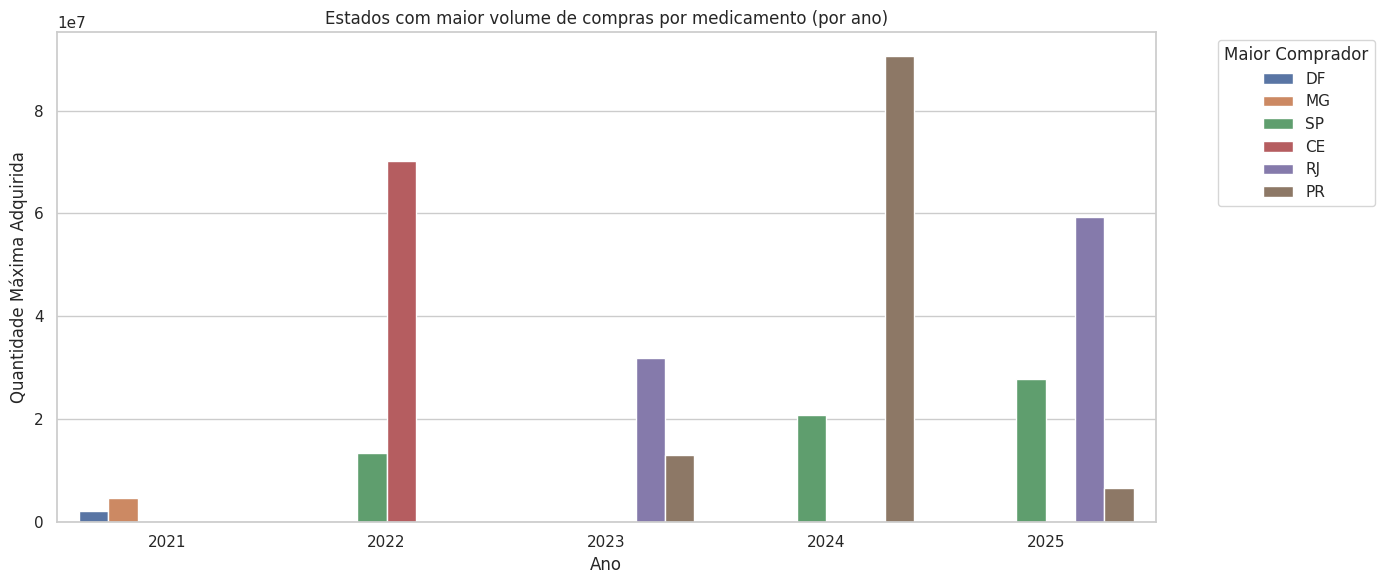

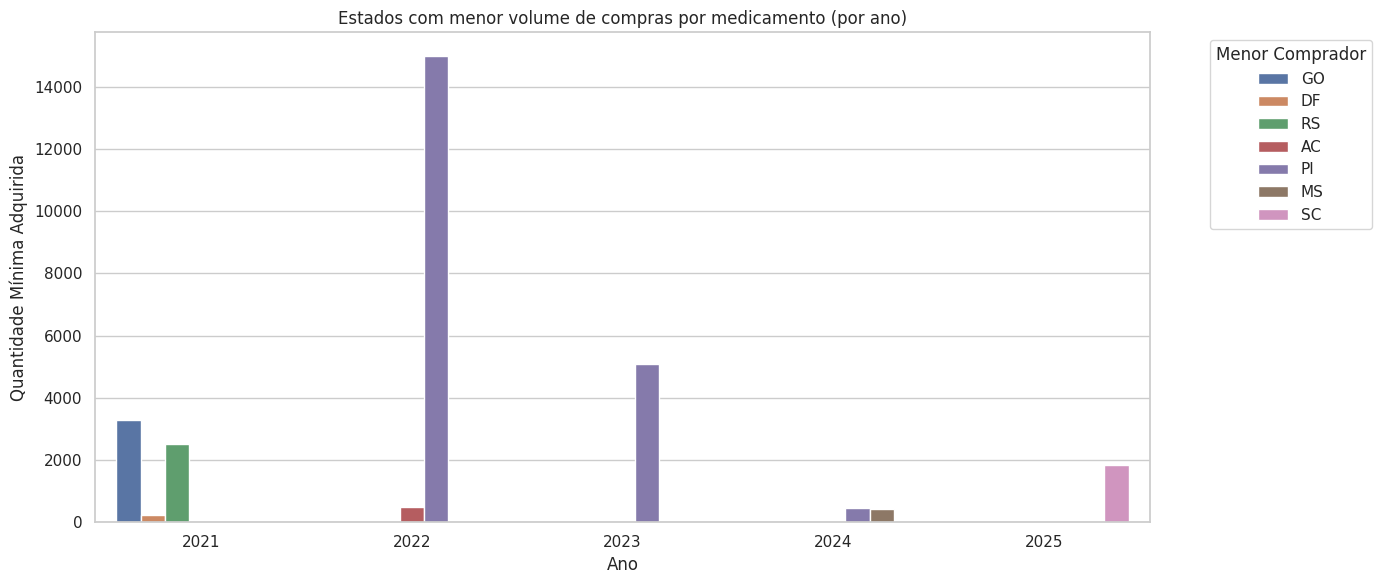

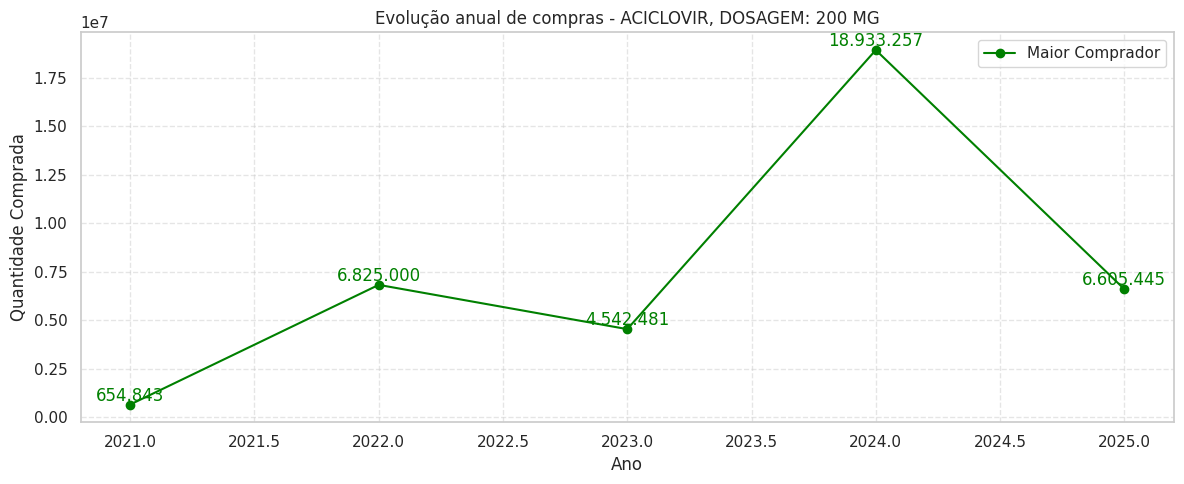

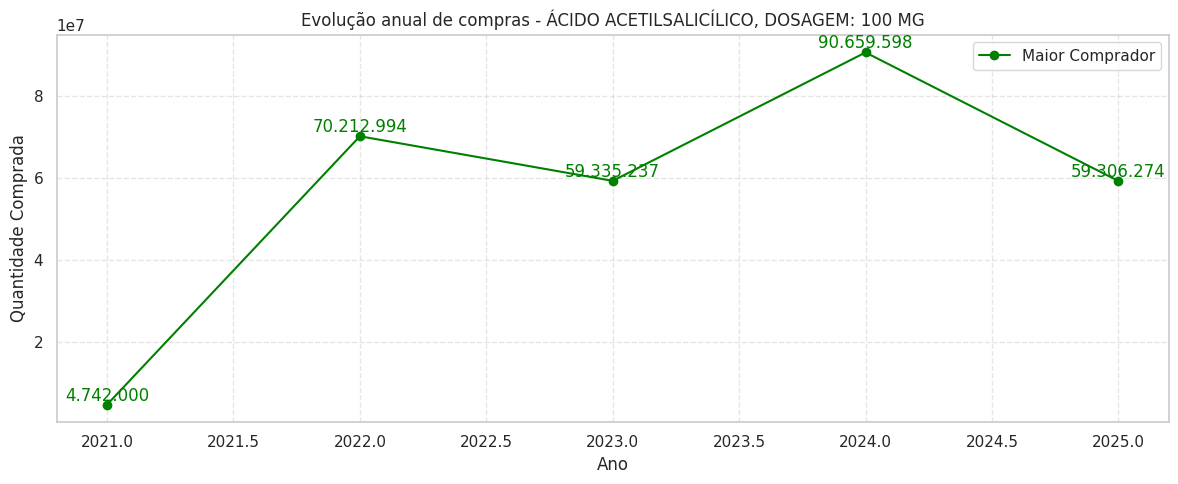

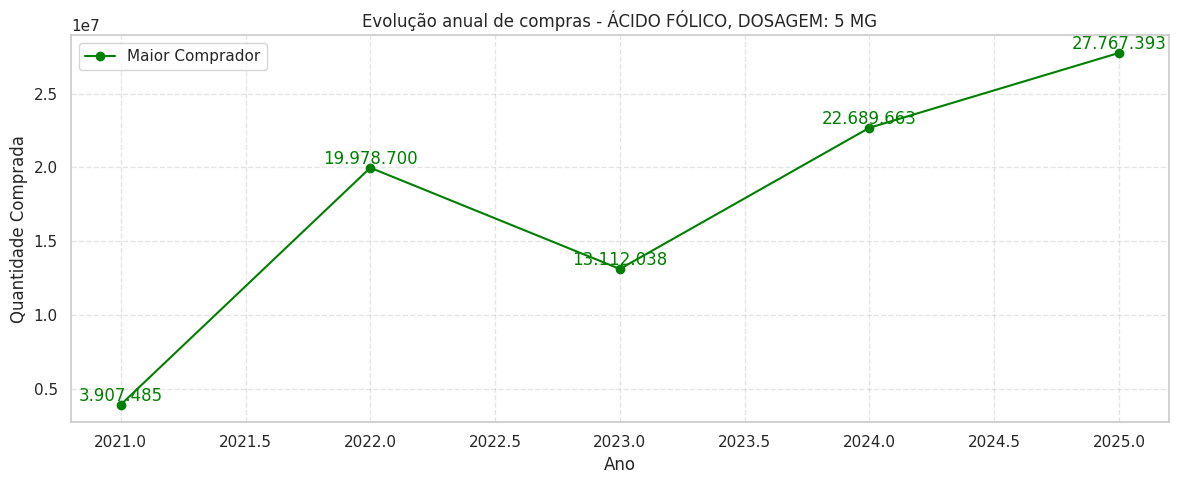

In [128]:
# Quais estados foram os maiores e menores compradores de cada medicamento por ano?
# Compras por estado e ano

df['anoCompra'] = df['dataCompra'].dt.year
compras_estadual_ano = (
    df.groupby(['anoCompra', 'estado', 'descricaoItem'])['quantidade']
      .sum()
      .reset_index()
)

# Top estados compradores por medicamento por ano
top_compradores = (
    compras_estadual_ano
      .sort_values(['descricaoItem', 'anoCompra', 'quantidade'], ascending=[True, True, False])
      .groupby(['descricaoItem', 'anoCompra'])
      .first()
      .reset_index()
      .rename(columns={'estado': 'Maior Comprador', 'quantidade': 'Qtd. Máxima'})
)

# Menores compradores por medicamento por ano (valores > 0, mais robusto)
menores_compradores = (
  compras_estadual_ano[compras_estadual_ano['quantidade'] > 0]
    .groupby(['descricaoItem', 'anoCompra'], as_index=False)
    .apply(lambda x: x.loc[x['quantidade'].idxmin()])
    .reset_index(drop=True)
    .rename(columns={'estado': 'Menor Comprador', 'quantidade': 'Qtd. Mínima'})
)



# Combina as informações de maior e meno,trazendo um comparativo classificado por medicamento e ordernado por ano.
comparativo_estadual = pd.merge(top_compradores, menores_compradores, on=['descricaoItem', 'anoCompra'], how='inner')
print("\nComparativo anual de estados com maior e menor volume de compras por medicamento:")
display(comparativo_estadual.sort_values(by=['descricaoItem', 'anoCompra']).head(20))

# Gráfico de barras duplas: maiores e menores compradores por medicamento por ano
plt.figure(figsize=(14, 6))
sns.barplot(data=comparativo_estadual, x='anoCompra', y='Qtd. Máxima', hue='Maior Comprador', errorbar=None)
plt.title('Estados com maior volume de compras por medicamento (por ano)')
plt.xlabel('Ano')
plt.ylabel('Quantidade Máxima Adquirida')
plt.legend(title='Maior Comprador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=comparativo_estadual, x='anoCompra', y='Qtd. Mínima', hue='Menor Comprador', errorbar=None)
plt.title('Estados com menor volume de compras por medicamento (por ano)')
plt.xlabel('Ano')
plt.ylabel('Quantidade Mínima Adquirida')
plt.legend(title='Menor Comprador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Gráfico de evolução por medicamento dos maiores compradores
for medicamento in comparativo_estadual['descricaoItem'].unique()[:5]:
    subset = comparativo_estadual[comparativo_estadual['descricaoItem'] == medicamento].sort_values('anoCompra')
    plt.figure(figsize=(12, 5))
    plt.plot(subset['anoCompra'], subset['Qtd. Máxima'], label='Maior Comprador', marker='o', color='green')

    for i, row in subset.iterrows():
        plt.text(row['anoCompra'], row['Qtd. Máxima'], f"{int(row['Qtd. Máxima']):,}".replace(',', '.'),
                 color='green', va='bottom', ha='center')

    plt.title(f"Evolução anual de compras - {medicamento}")
    plt.xlabel("Ano")
    plt.ylabel("Quantidade Comprada")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()



 Análise de marcas/laboratórios mais comprados por medicamento:

 Seleciona o top 3 marcas por medicamento:


,descricaoItem,marca,quantidade
61,"ACICLOVIR, DOSAGEM: 200 MG",CPR,12803675
69,"ACICLOVIR, DOSAGEM: 200 MG",CX C/ 30 CP,10457918
109,"ACICLOVIR, DOSAGEM: 200 MG",GÉNERICO/CIMED,7193646
344,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",SALICETIL,102139253
319,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",IMEC,73260086
290,"ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG",DORMEC | 14259000600,71380000
483,"ÁCIDO FÓLICO, DOSAGEM: 5 MG",HIPOLABOR,39326595
502,"ÁCIDO FÓLICO, DOSAGEM: 5 MG",NATULAB,20461413
426,"ÁCIDO FÓLICO, DOSAGEM: 5 MG",BRAINFARMA,19642010


/tmp/ipython-input-129-293609904.py:31: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


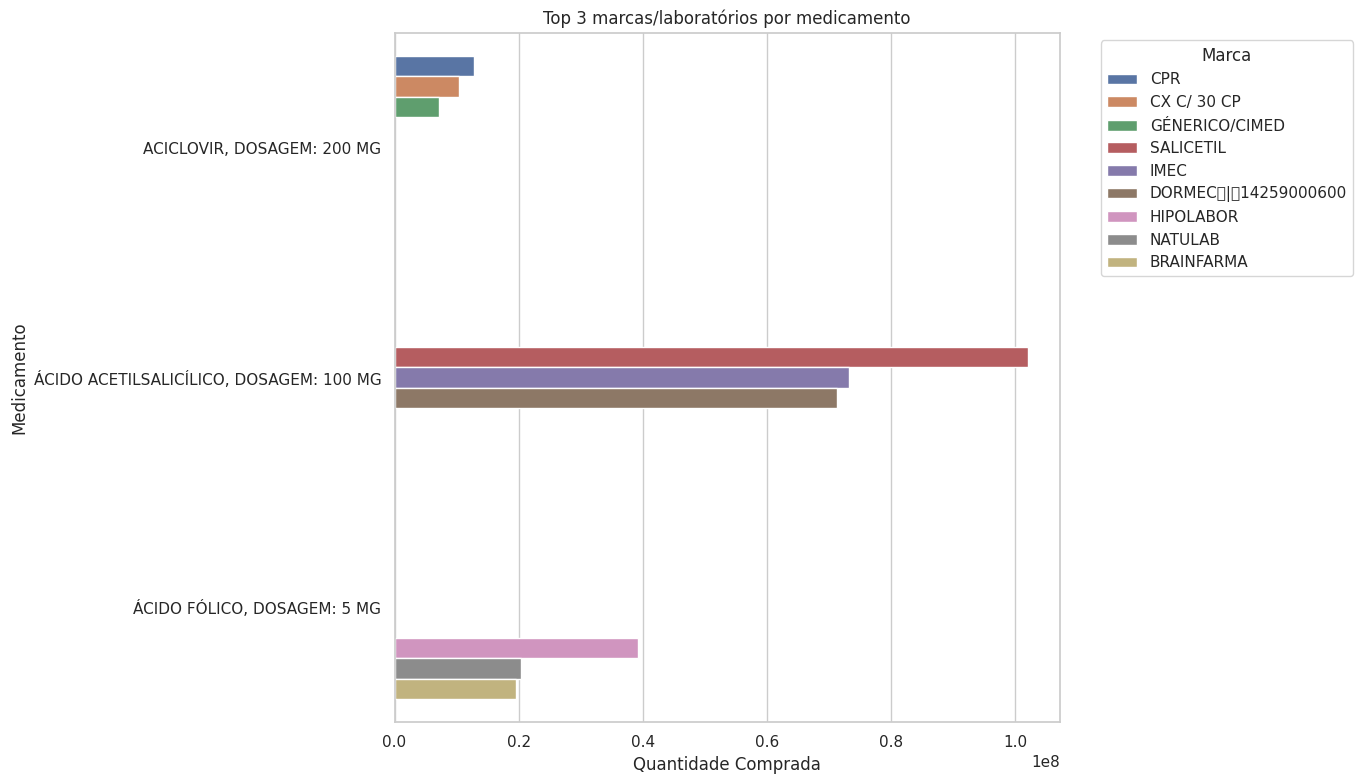


 Avaliando repetição de preferência de marca por região (exemplo com top 5 medicamentos):


,descricaoItem,estado,marca,quantidade
0,"ACICLOVIR, DOSAGEM: 200 MG",AC,-,120
1,"ACICLOVIR, DOSAGEM: 200 MG",AC,268370,45000
2,"ACICLOVIR, DOSAGEM: 200 MG",AC,COMPRIMIDO,6000
3,"ACICLOVIR, DOSAGEM: 200 MG",AC,PHARLAB,12600
4,"ACICLOVIR, DOSAGEM: 200 MG",AC,PRATI,1200
5,"ACICLOVIR, DOSAGEM: 200 MG",AC,Prati,21396
6,"ACICLOVIR, DOSAGEM: 200 MG",AC,cx c/ 450,3000
7,"ACICLOVIR, DOSAGEM: 200 MG",AL,200 MG COM CT BL AL,210089
8,"ACICLOVIR, DOSAGEM: 200 MG",AL,ACICLOVIR,300
9,"ACICLOVIR, DOSAGEM: 200 MG",AL,CIMED,80000


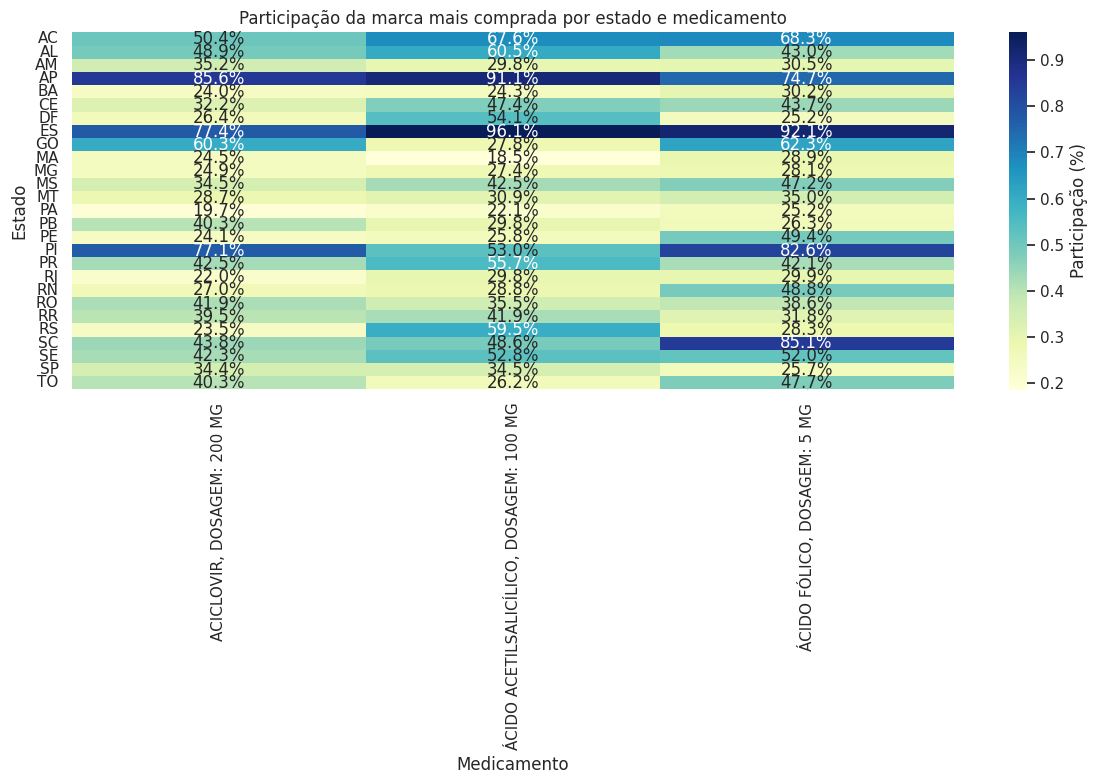

In [129]:
# Quais marcas/laboratórios são preferência de compra? Esse padrão se repete entre regiões?

# Preferência por marcas/laboratórios

print("\n Análise de marcas/laboratórios mais comprados por medicamento:")
marcas_preferidas = (
    df.groupby(['descricaoItem', 'marca'])['quantidade']
      .sum()
      .reset_index()
)

# Seleciona o top 3 marcas por medicamento
print("\n Seleciona o top 3 marcas por medicamento:")
top_marcas = (
    marcas_preferidas
    .sort_values(['descricaoItem', 'quantidade'], ascending=[True, False])
    .groupby('descricaoItem')
    .head(3)
)

# Exibe tabela
display(top_marcas.head(10))

# Gráfico de barras horizontais por medicamento
plt.figure(figsize=(14, 8))
sns.barplot(data=top_marcas, y='descricaoItem', x='quantidade', hue='marca')
plt.xlabel('Quantidade Comprada')
plt.ylabel('Medicamento')
plt.title('Top 3 marcas/laboratórios por medicamento')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Verifica consistência regional nas marcas preferidas
# ----------------------------------------------
# Esse bloco analisa se a preferência por marcas/laboratórios é consistente entre os estados.
# Seleciona os 5 medicamentos mais frequentemente comprados.
# Filtra o DataFrame para conter apenas esses medicamentos.
# Agrupa por medicamento, estado e marca para somar a quantidade comprada.
# Para cada combinação de medicamento e estado, identifica a marca mais comprada.
# Calcula a participação percentual da marca mais comprada sobre o total daquele medicamento no estado.
# Exibe os resultados em um mapa de calor (heatmap), onde cada célula mostra a dominância percentual da marca líder para aquele medicamento em um estado específico.
# Essa análise permite identificar se uma mesma marca lidera as compras em todos os estados ou se existem preferências locais distintas, ajudando a entender padrões regionais de aquisição.
# ----------------------------------------------
print("\n Avaliando repetição de preferência de marca por região (exemplo com top 5 medicamentos):")
top5_meds = df['descricaoItem'].value_counts().head(5).index.tolist()
df_top = df[df['descricaoItem'].isin(top5_meds)]

preferencia_regional = (
    df_top.groupby(['descricaoItem', 'estado', 'marca'])['quantidade']
    .sum()
    .reset_index()
)

# Mostra amostra dos dados processados
display(preferencia_regional.head(10))

# Top fornecedor por medicamento por estado
top_marca_regiao = (
    preferencia_regional.sort_values(['descricaoItem', 'estado', 'quantidade'], ascending=[True, True, False])
                        .groupby(['descricaoItem', 'estado'])
                        .first()
                        .reset_index()
)

# Normaliza para obter participação percentual por estado e medicamento
total_por_estado_medicamento = (
    preferencia_regional.groupby(['descricaoItem', 'estado'])['quantidade'].sum().reset_index(name='total')
)
top_marca_regiao = top_marca_regiao.merge(total_por_estado_medicamento, on=['descricaoItem', 'estado'])
top_marca_regiao['participacao'] = top_marca_regiao['quantidade'] / top_marca_regiao['total']

# Gráfico de calor por medicamento e estado para marca mais preferida
pivot = top_marca_regiao.pivot(index='estado', columns='descricaoItem', values='participacao')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.1%', cmap='YlGnBu', cbar_kws={'label': 'Participação (%)'})
plt.title("Participação da marca mais comprada por estado e medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()



## 4.4 Sobre o Preço Pago por Item

### Seleção do medicamento e abordagem analítica

Para esta análise, foi selecionado o medicamento **ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG**, o mais adquirido no conjunto de dados, com compras registradas por 27 estados. Essa escolha garante representatividade territorial e volume suficiente para comparações robustas.

A metodologia aplicada consistiu em calcular, para cada estado:
- O **custo total** das aquisições (quantidade × preço unitário),
- A **quantidade total adquirida**, e
- O **preço médio ponderado** por unidade, considerando o volume comprado.

Essa abordagem permite identificar variações reais nos preços praticados entre estados, corrigindo distorções que poderiam surgir se apenas médias simples fossem utilizadas.

### Discrepâncias de preço entre estados

A análise revelou variações expressivas entre os estados. A Paraíba, por exemplo, apresentou o maior preço máximo registrado (205.000,00 por unidade), além de uma média elevada (23.480,04), acompanhada de alto desvio padrão, o que sugere a ocorrência de compras pontuais com valores bastante acima do padrão.

Estados como São Paulo e Minas Gerais também exibiram preços médios superiores à média nacional, com grande variabilidade, indicando que diferentes fornecedores, formatos de fornecimento ou modalidades de compra podem ter influenciado esses valores.

Em contrapartida, estados como Espírito Santo, Paraná e Alagoas apresentaram preços médios ponderados bastante inferiores, compatíveis com os valores esperados para esse medicamento no mercado.

Essas disparidades sugerem possíveis inconsistências nos registros, falhas de padronização na unidade de fornecimento e ausência de controles eficazes sobre limites de preços em determinadas contratações.

---

### Variação dos preços ao longo do tempo

A avaliação da variação anual dos preços demonstra um comportamento bastante irregular, especialmente a partir de 2023. Nos anos de 2021 e 2022, os preços médios mantinham-se baixos e estáveis, com médias inferiores a 0,31 por unidade e desvios padrão igualmente modestos.

A partir de 2023, no entanto, é observado uma ruptura nesse padrão. O preço médio salta para mais de 400,00, acompanhado de um desvio padrão superior a 6.000. Em 2024, essa tendência se intensifica: o preço médio ultrapassa  1.000, com valores máximos chegando a 253.300,00 por unidade, um número completamente incompatível com a realidade de mercado e que indica possível erro de registro, inconsistência na unidade de medida, ou mesmo irregularidades na contratação.

No ano de 2025, os dados continuam indicando instabilidade, com média acima de 3.600 e desvio padrão próximo de 26.500. Esse padrão reforça a hipótese de descontrole nos preços praticados e evidencia a necessidade de mecanismos de validação automática de valores e auditoria de compras fora dos padrões usuais.

---

### Influência da modalidade e forma de compra

A análise dos dados por modalidade de licitação e forma de compra demonstra que essas variáveis exercem influência significativa sobre o preço final dos medicamentos.

No caso das modalidades, a **modalidade 5** foi a mais utilizada. Apesar de apresentar uma mediana coerente com o mercado (0,05), a média dos preços ficou em 1.071,46, com um desvio padrão elevado, indicando a presença de compras com valores muito acima do padrão. Já a **modalidade 6** apresentam média de 66,03, o que sugere menor controle ou maior risco de variação nos preços.

Quanto à forma de compra, a diferença entre **SISRP** (Sistema de Registro de Preços) e **SISPP** (Sistema de Preços Praticados) também foi relevante. O SISRP demonstrou valores mais coerentes com a realidade de mercado, com média de 135 e mediana de 0,05. Por outro lado, o SISPP apresentou uma média extremamente elevada (6.972,58), com desvio padrão superior a 38.000, indicando forte presença de outliers e fragilidade no controle de preços.

---

### Considerações finais

A análise evidencia que o preço pago por um mesmo medicamento pode variar de forma expressiva não apenas entre estados, mas também ao longo do tempo e de acordo com a modalidade e a forma de compra adotada. Essas variações indicam a necessidade urgente de padronização na catalogação dos itens, controle mais rigoroso sobre as unidades de fornecimento e implementação de limites de referência nos sistemas de compras públicas.

Além disso, os dados demonstram que a **forma como o processo de compra é conduzido pode afetar diretamente o valor final pago**, tornando essencial o fortalecimento de mecanismos de governança e auditoria, especialmente no contexto de medicamentos, onde os impactos sobre as políticas públicas de saúde e o orçamento são significativos.


In [130]:

# Seleção de  apenas um medicamento de interesse de, pelo menos, 4 estados distintos para realizar comparação de preços de aquisição.
print("\nComparação de preços por medicamento entre estados:")

# Seleciona um medicamento amplamente adquirido
med_comparativo = df['descricaoItem'].value_counts().idxmax()
df_med = df[df['descricaoItem'] == med_comparativo].copy()

# Verifica número de estados com compras
ufs_compradoras = df_med['estado'].nunique()
print(f" Medicamento escolhido: {med_comparativo} — adquirido por {ufs_compradoras} estados.")

# Cálculo do custo total por linha
df_med["custoTotal"] = df_med["quantidade"] * df_med["precoUnitario"]


# Preço médio ponderado por estado (
media_ponderada_por_estado = (
    df_med.groupby("estado")[["custoTotal", "quantidade"]]
    .sum()
    .assign(precoUnitarioPonderado=lambda x: x["custoTotal"] / x["quantidade"])
    [["precoUnitarioPonderado"]]
)

print("\n Preço médio ponderado por estado:")
display(media_ponderada_por_estado.sort_values("precoUnitarioPonderado", ascending=False))


# Há discrepância de preços entre diferentes regiões/estados/cidades?
#Estatísticas descritivas por estado
print("\n Estatísticas descritivas por estado:")
estatisticas_estado = (
    df_med.groupby('estado')['precoUnitario']
    .agg(['min', 'max', 'mean', 'std', 'count'])
    .sort_values('mean', ascending=False)
)
display(estatisticas_estado.head(4))

# Estatísticas de variação anual (complemento)
variacao_anual = (
    df_medicamento.groupby('ano')['precoUnitario']
    .agg(['mean', 'std', 'min', 'max', 'count'])
    .sort_index()
)
print("\n Estatísticas anuais de preço para o medicamento analisado:")
display(variacao_anual)

# Estatísticas por modalidade
print("\nComparação de preço por modalidade de compra:")
estat_mod = (
    df_medicamento.groupby('modalidade')['precoUnitario']
    .agg(['mean', 'median', 'std', 'count'])
    .sort_values('mean', ascending=False)
)
display(estat_mod)

# Estatísticas por forma de compra (SISPP/SISRP)
print("\nComparação de preço por forma de compra (SISRP/SISPP):")
estat_forma = (
    df_medicamento.groupby('forma')['precoUnitario']
    .agg(['mean', 'median', 'std', 'count'])
    .sort_values('mean', ascending=False)
)
display(estat_forma)




Comparação de preços por medicamento entre estados:
 Medicamento escolhido: ÁCIDO ACETILSALICÍLICO, DOSAGEM: 100 MG — adquirido por 27 estados.

 Preço médio ponderado por estado:


,precoUnitarioPonderado
estado,
PB,0.138553
PA,0.069649
PI,0.057375
AM,0.050472
AP,0.050213
TO,0.049621
RR,0.048370
SP,0.048319
MA,0.048007



 Estatísticas descritivas por estado:


,min,max,mean,std,count
estado,,,,,
PB,0.02,205000.00,23480.044000,64989.162027,25
SP,0.02,253300.00,3015.640714,27637.277635,84
MG,0.03,100000.00,1888.040566,13735.882989,53
PR,0.02,9284.55,91.315294,919.281784,102



 Estatísticas anuais de preço para o medicamento analisado:


,mean,std,min,max,count
ano,,,,,
2021,0.053529,0.040918,0.03,0.21,17
2022,0.311496,2.228768,0.02,30.40,254
2023,407.372632,6362.795239,0.03,100000.00,247
2024,1065.629317,16060.807751,0.02,253300.00,249
2025,3624.167222,26495.188894,0.02,205000.00,162



Comparação de preço por modalidade de compra:


,mean,median,std,count
modalidade,,,,
5,1071.45947,0.05,14581.372022,887
6,66.03119,0.15,412.245254,42



Comparação de preço por forma de compra (SISRP/SISPP):


,mean,median,std,count
forma,,,,
SISPP,6972.584959,0.07,38016.962385,121
SISRP,135.488960,0.05,3532.706929,808


## 4.5 Indicadores e Reflexões

Para compreender como as políticas públicas vêm se desenrolando ao longo do tempo, especialmente em áreas críticas como a saúde, a construção de indicadores é essencial. A partir dos dados disponibilizados pelo Compras.gov.br, já é possível gerar uma série de métricas que ajudam a identificar padrões, apontar ineficiências, monitorar riscos e apoiar tomadas de decisão mais informadas.

A seguir, apresento alguns exemplos de indicadores que podem ser extraídos diretamente do Compras.gov.br ou combinados com outras bases públicas para oferecer uma visão completa da atuação governamental na aquisição de medicamentos.

### Indicadores calculáveis a partir do Compras.gov.br

**Preço médio ponderado por medicamento e estado**  
Permite observar quanto, em média, cada estado pagou por uma unidade de determinado medicamento, levando em consideração o volume comprado.  
> Utilidade: comparar práticas de compra entre regiões e identificar possíveis sobrepreços.

**Variação anual do preço por item**  
Analisa a evolução do preço de cada medicamento ao longo dos anos, detectando aumentos abruptos, quedas ou comportamentos fora do esperado.  
> Utilidade: sinalizar alterações de mercado ou fragilidades no processo de compra.

**Concentração de fornecedores por item ou região**  
Mede o nível de concorrência nas compras, indicando se as aquisições estão concentradas em poucos fornecedores ou distribuídas entre vários.  
> Utilidade: avaliar riscos de dependência e vulnerabilidade no fornecimento.

**Participação percentual do principal fornecedor por estado**  
Mostra o quanto um único fornecedor representa em termos de quantidade fornecida para cada estado.  
> Utilidade: identificar estados com compras excessivamente concentradas em um único player.

**Percentual de compras com preço acima da mediana nacional por item**  
Compara o preço pago por um órgão com a mediana nacional daquele mesmo medicamento.  
> Utilidade: indicar ineficiências e possíveis desvios em processos locais.

**Tempo médio entre a data da compra e a atualização no sistema**  
Mede a agilidade no registro das informações no Compras.gov.br.  
> Utilidade: acompanhar a qualidade e a tempestividade dos dados disponibilizados ao público.

---

### Indicadores com apoio de bases externas

Para enriquecer as análises e contextualizar melhor os dados de compras, é possível combinar o Compras.gov.br com outras fontes públicas de informação. Abaixo, alguns indicadores e os datasets que podem ser utilizados:

**Custo per capita com medicamentos por estado**  
> Total gasto dividido pela população estimada de cada estado.  
- Fonte complementar: [IBGE – Estimativas Populacionais](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html)  
> Utilidade: medir o esforço de investimento em medicamentos considerando o tamanho da população atendida.

**Alinhamento entre compras e perfil epidemiológico regional**  
> Compara os medicamentos adquiridos com os principais agravos de saúde da população local.  
- Fonte complementar: [DATASUS – Indicadores de Saúde](https://datasus.saude.gov.br/) e [SINAN – Notificações de Doenças](https://portalsinan.saude.gov.br/)  
> Utilidade: verificar se as compras estão sendo orientadas por necessidades reais de saúde.

**Correlação entre modalidade de compra e eficiência de preço**  
> Avalia se algumas modalidades (como pregão ou dispensa) estão associadas a preços mais baixos ou mais altos.  
> Utilidade: apoiar escolhas estratégicas na definição de políticas de aquisição.

---

### Considerações finais

A criação e o monitoramento regular desses indicadores podem contribuir significativamente para a transparência, a eficiência e a efetividade das políticas públicas de saúde. Mais do que apenas medir, esses dados ajudam a entender **onde estamos investindo recursos, como esses recursos estão sendo aplicados, e onde podemos melhorar**.

Ao integrar essas métricas em relatórios periódicos, sistemas de visualização ou mesmo plataformas públicas de acompanhamento, abre-se espaço para tomadas de decisão baseadas em evidências e maior responsabilidade na gestão dos recursos públicos.
